# Family name Analises

## Finance

### Read datasets

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from collections import Counter


In [39]:
df_aux_emergencial_nova_iguacu = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-nova-iguacu.csv', sep = ";")
df_aux_emergencial_balsas = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-balsas.csv', sep = ";")
df_aux_emergencial_jupi = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-jupi.csv', sep = ";")
df_aux_emergencial_maues = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-maues.csv', sep = ";")
df_aux_emergencial_chapeco = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-chapeco.csv', sep = ";")
df_aux_emergencial_corumba = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-corumba.csv', sep = ";")
df_aux_emergencial_trindade = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-trindade.csv', sep = ";")
df_aux_emergencial_guarapari = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-guarapari.csv', sep = ";")
df_aux_emergencial_araraguara = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/auxilio_emergencial-araraquara.csv', sep = ";")


In [40]:
df_aux_emergencial = df_aux_emergencial_nova_iguacu.append(df_aux_emergencial_balsas)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_jupi)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_maues)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_chapeco)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_corumba)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_trindade)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_guarapari)
df_aux_emergencial = df_aux_emergencial.append(df_aux_emergencial_araraguara)

In [37]:
df_names = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/grupos.csv')

In [38]:
df_aux_emergencial.head()

,UF,Município,CPF Beneficiário,NIS Beneficiário,Beneficiário,Nome Responsável Familiar,CPF Responsável Familiar,NIS Responsável Familiar,Observação,Valor Disponibilizado,Unnamed: 10
0,RJ,NOVA IGUAÇU,***.876.767-**,NaN,ADA CAROLINA TAVARES DE SOUZA,Não se aplica,NaN,NaN,Não há,"1.200,00",NaN
1,RJ,NOVA IGUAÇU,***.823.097-**,1.270.451.460-9,ADAIL DE SOUZA ALMEIDA,ROBERTA LIMA RODRIGUES,***.087.227-**,1.656.106.587-6,NaN,"636,00",NaN
2,RJ,NOVA IGUAÇU,***.957.277-**,NaN,ADEIL LUIZ MARQUES,Não se aplica,NaN,NaN,Não há,"900,00",NaN
3,RJ,NOVA IGUAÇU,***.861.657-**,1.702.329.197-9,ADELMO ELIAS MACIEL,ADELMO ELIAS MACIEL,***.861.657-**,1.702.329.197-9,NaN,"404,00",NaN
4,RJ,NOVA IGUAÇU,***.158.657-**,NaN,ADNELSON FRANCISCO LOPES,Não se aplica,NaN,NaN,Não há,"1.800,00",NaN


In [8]:
df_names.head()

,name,classification,frequency_female,frequency_male,frequency_total,ratio,names
0,ALINE,F,528515,2035,530550,0.996164,|AALINE|AILINE|ALEINE|ALIINE|ALINE|ALINER|ALIN...
1,ARAO,M,0,3526,3526,1.000000,|AARAO|ARAAO|ARAO|
2,ARON,M,0,3442,3442,1.000000,|AARON|AHARON|AROM|ARON|ARYON|HARON|
3,ADA,F,5294,289,5583,0.948236,|ABA|ADA|ADAH|ADAR|ADHA|HADA|
4,ABADE,M,0,57,57,1.000000,|ABADE|


In [9]:
len(df_names)

50743

In [41]:
def listFamilyName(df, column_name, names):
  list_family_name = []
  list_ds = ["DA", "DAS", "DE", "DO", "DOS", "MARIA", "APARECIDA", "CRISTINA", "CARLOS", "HENRIQUE", "LUIS"]

  for name in df[column_name]:
    fullname = name.split(" ")
    after_d = False
    for i in range(1, len(fullname)):
      if i >= 3 and (not fullname[i].upper() in list_ds) and (len(fullname[i]) > 1):
        list_family_name.append(fullname[i].upper())

      if fullname[i] in list_ds:
        after_d = True
        continue
      
      if (i == 2 and after_d) or (i == 1) and ((not fullname[i].upper() in list_ds)) and (len(fullname[i]) > 1):
        if not fullname[i] in names:
          list_family_name.append(fullname[i].upper())
          continue
      
  return list_family_name

In [42]:
# Recieve a column with texts and return a dataframe with the top n words more often and the amount of times that happens
def word_counter (df, number):
  word_count = Counter(" ".join(df).split()).most_common(number)
  word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
  
  return word_frequency


In [43]:
list_family_name = listFamilyName(df_aux_emergencial, 'Beneficiário', df_names['name'])

In [44]:
frequency_words = word_counter(list_family_name, 20)

In [45]:
frequency_words

,Word,Frequency
0,SILVA,363
1,SANTOS,203
2,OLIVEIRA,156
3,SOUZA,111
4,ALVES,57
5,FERREIRA,55
6,PEREIRA,55
7,RODRIGUES,49
8,COSTA,46
9,LIMA,42


Text(0.5, 1.0, 'Family names - emergency aid')

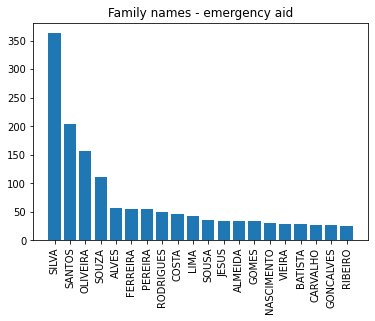

In [46]:
plt.bar(frequency_words['Word'], frequency_words['Frequency'])
plt.xticks(rotation=90)
plt.title('Family names - emergency aid')

In [47]:
df_names_most_rich = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/familyname_most_rich.csv', sep = "\t")

In [48]:
df_names_most_rich.head()

,#,Nome,Fortuna (USD),Idade,Fonte da riqueza,Fontes
0,1,Eduardo Saverin,"19,3 bilhões",39,Meta Platforms (co-fundador),[2]
1,2,Jorge Paulo Lemann,"19,1 bilhões",82,"AB InBev, 3G Capital & outros",[3][4]
2,3,Jorge Moll Filho,"13,1 bilhões",76,Rede D'Or,[5]
3,4,Marcel Herrmann Telles,"12,7 bilhões",71,"AB InBev, 3G Capital & outros",[6]
4,5,Carlos Alberto Sicupira,"9,8 bilhões",73,"AB InBev, 3G Capital & outros",[7]


In [49]:
list_family_name2 = listFamilyName(df_names_most_rich, 'Nome', df_names['name'])

In [50]:
frequency_words = word_counter(list_family_name2, 20)
frequency_words

,Word,Frequency
0,MOREIRA,4
1,FEFFER,4
2,VILLELA,3
3,HELENA,2
4,KOREN,2
5,LIMA,2
6,BATISTA,2
7,BUENO,2
8,FILHO,2
9,GRENDENE,2


Text(0.5, 1.0, 'Family name - Most rich people in Brazil')

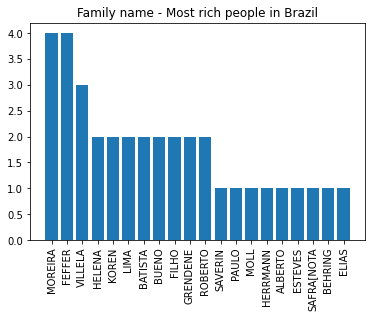

In [51]:
plt.bar(frequency_words['Word'], frequency_words['Frequency'])
plt.xticks(rotation=90)
plt.title('Family name - Most rich people in Brazil')

## Education



In [ ]:
df_fuvest2021 = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/fuvest2021.csv')

In [ ]:
df_fuvest2021.head()

,FUVEST 2021 Lista de Publicação
0,1ª Chamada − Chamados para Matrícula
1,NOME CPF CURSO NOME CPF CURSO NOME CPF CURSO
2,A
3,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA
4,Abayomi Kayode Alves 460.849 430−09


In [ ]:
def listFamilyNameFuvest(df, column_name, names):
  list_family_name = []
  list_ds = ["DA", "DAS", "DE", "DO", "DOS", "MARIA", "APARECIDA", "CRISTINA","PAULA", "LUIZ", "CAROLINA", "EDUARDO", "CARLOS", "HENRIQUE", "PEDRO", "NÚMERO"]

  for name in df[column_name]:
    fullname = name.split(" ")
    if len(fullname) > 1 and (not 'FUVEST' in fullname) and (not 'NOME' in fullname) and (not 'chamada' in fullname)and (not 'CHAMADA' in fullname):
      after_d = False
      for i in range(1, len(fullname)-1):
        if i >= 3 and (not fullname[i].upper() in list_ds) and (len(fullname[i]) > 1):
          list_family_name.append(fullname[i].upper())

        if fullname[i].upper() in list_ds:
          after_d = True
          continue
        
        if (i == 2 and after_d) or (i == 1) and ((not fullname[i] in list_ds)) and (len(fullname[i]) > 1):
          if not fullname[i].upper() in names:
            list_family_name.append(fullname[i].upper())
            continue
        
  return list_family_name

In [ ]:
list_family_name = listFamilyNameFuvest(df_fuvest2021, 'FUVEST 2021 Lista de Publicação', df_names['name'])

In [ ]:
frequency_words1 = word_counter(list_family_name, 20)

In [ ]:
frequency_words1

,Word,Frequency
0,SILVA,604
1,SANTOS,420
2,OLIVEIRA,368
3,SOUZA,304
4,LIMA,137
5,FERREIRA,136
6,RODRIGUES,130
7,ALMEIDA,109
8,COSTA,106
9,PEREIRA,104


Text(0.5, 1.0, 'Family name USP students in 2021')

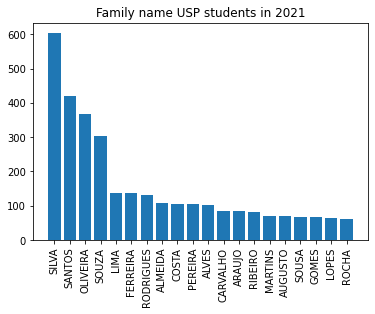

In [ ]:
plt.bar(frequency_words1['Word'], frequency_words1['Frequency'])
plt.xticks(rotation=90)
plt.title("Family name USP students in 2021")

In [ ]:
df_fuvest2001 = pd.read_csv('/content/drive/MyDrive/IME/Blog/datasets/fuvest2001.csv')

In [ ]:
df_fuvest2001.head()

,FUVEST 2001 LISTA DE PUBLICAÇÃO
0,PRIMEIRA CHAMADA
1,NOME NÚMERO CAR/CUR NOME NÚMERO CAR/CUR NOME N...
2,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
3,A
4,ABEL SCUPELITI ARTILHEIRO 1404694 312−42


In [ ]:
len(df_fuvest2001)

7942

In [ ]:
len(df_fuvest2021)

7931

In [ ]:
list_family_name = listFamilyNameFuvest(df_fuvest2001, 'FUVEST 2001 LISTA DE PUBLICAÇÃO', df_names['name'])

In [ ]:
frequency_words2 = word_counter(list_family_name, 20)

In [ ]:
frequency_words2

,Word,Frequency
0,SILVA,407
1,OLIVEIRA,292
2,SANTOS,200
3,SOUZA,174
4,RODRIGUES,121
5,FERREIRA,112
6,COSTA,109
7,LIMA,104
8,ALMEIDA,103
9,CARVALHO,99


(0.0, 600.0)

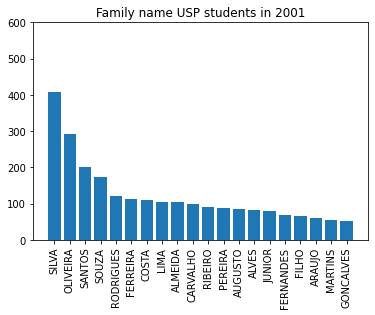

In [ ]:
plt.bar(frequency_words2['Word'], frequency_words2['Frequency'])
plt.xticks(rotation=90)
plt.title("Family name USP students in 2001")
plt.ylim(0, 600)

Family name in 2001 | Frequency | Family name in 2021 | Frequency 
---------: | :------: | ---------: | :------:
SILVA	| 407   | SILVA |	604
OLIVEIRA	| 292 | SANTOS	| 420
SANTOS	| 200 | OLIVEIRA	| 368
SOUZA	| 174 | SOUZA	| 304
RODRIGUES	| 121 | LIMA	| 137
FERREIRA	| 112 | FERREIRA	| 136
COSTA	| 109 | RODRIGUES	| 130
LIMA	| 104 | ALMEIDA	| 109
ALMEIDA	| 103 | COSTA	| 106
CARVALHO	| 99 | PEREIRA	| 104










